In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
## dataset source : https://www.kaggle.com/datasets/robertsunderhaft/nba-player-season-statistics-with-mvp-win-share

In [3]:
unclean_df = pd.read_csv('NBA_Dataset.csv')

In [4]:
unclean_df.head()

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768


In [5]:
## Checking for missing values
missing_values = unclean_df.isnull().sum()
missing_values

season                 0
player                 0
pos                    0
age                    0
team_id                0
g                      0
gs                     0
mp_per_g               0
fg_per_g               0
fga_per_g              0
fg_pct                63
fg3_per_g              0
fg3a_per_g             0
fg3_pct             2623
fg2_per_g              0
fg2a_per_g             0
fg2_pct              106
efg_pct               63
ft_per_g               0
fta_per_g              0
ft_pct               576
orb_per_g              0
drb_per_g              0
trb_per_g              0
ast_per_g              0
stl_per_g              0
blk_per_g              0
tov_per_g              0
pf_per_g               0
pts_per_g              0
mp                     0
per                    3
ts_pct                55
fg3a_per_fga_pct      63
fta_per_fga_pct       63
orb_pct                3
drb_pct                3
trb_pct                3
ast_pct                3
stl_pct                3


In [6]:
### after checking the data set, it shows that when calculating percentages, if the numerator and denominator values are both zero, the result is often left null
## so i change them with 0

columns_to_fill = ['fg_pct','fg3_pct', 'fg2_pct', 'efg_pct', 'ft_pct', 'ts_pct', 'fg3a_per_fga_pct','fta_per_fga_pct','orb_pct','drb_pct','trb_pct','ast_pct','stl_pct','blk_pct','tov_pct','usg_pct']
unclean_df[columns_to_fill] = unclean_df[columns_to_fill].fillna(0) 

In [7]:
missing_values = unclean_df.isnull().sum()
missing_values

season              0
player              0
pos                 0
age                 0
team_id             0
g                   0
gs                  0
mp_per_g            0
fg_per_g            0
fga_per_g           0
fg_pct              0
fg3_per_g           0
fg3a_per_g          0
fg3_pct             0
fg2_per_g           0
fg2a_per_g          0
fg2_pct             0
efg_pct             0
ft_per_g            0
fta_per_g           0
ft_pct              0
orb_per_g           0
drb_per_g           0
trb_per_g           0
ast_per_g           0
stl_per_g           0
blk_per_g           0
tov_per_g           0
pf_per_g            0
pts_per_g           0
mp                  0
per                 3
ts_pct              0
fg3a_per_fga_pct    0
fta_per_fga_pct     0
orb_pct             0
drb_pct             0
trb_pct             0
ast_pct             0
stl_pct             0
blk_pct             0
tov_pct             0
usg_pct             0
ows                 0
dws                 0
ws        

In [8]:
## per and ws_per_48 have also missing values, i'll drop them
unclean_df.dropna(how='any', inplace=True)
unclean_df.reset_index(drop=True, inplace=True)

In [9]:
unclean_df.isnull().values.any()

False

In [10]:
unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17694 entries, 0 to 17693
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            17694 non-null  int64  
 1   player            17694 non-null  object 
 2   pos               17694 non-null  object 
 3   age               17694 non-null  int64  
 4   team_id           17694 non-null  object 
 5   g                 17694 non-null  int64  
 6   gs                17694 non-null  int64  
 7   mp_per_g          17694 non-null  float64
 8   fg_per_g          17694 non-null  float64
 9   fga_per_g         17694 non-null  float64
 10  fg_pct            17694 non-null  float64
 11  fg3_per_g         17694 non-null  float64
 12  fg3a_per_g        17694 non-null  float64
 13  fg3_pct           17694 non-null  float64
 14  fg2_per_g         17694 non-null  float64
 15  fg2a_per_g        17694 non-null  float64
 16  fg2_pct           17694 non-null  float6

In [11]:
## i ll cut the season which is 2022 to use for prediction and i dropped the award share, beacause i try to estimate award_share
predict_data = unclean_df[unclean_df['season'] == 2022].copy()
predict_data.drop(columns=['award_share'], inplace = True)
predict_data.to_csv('predict_data_2022.csv', index=False)

unclean_df = unclean_df.drop(unclean_df[unclean_df['season'] == 2022].index)

In [12]:
## dropping of categorical values
categorical_columns = unclean_df.select_dtypes('object').columns
categorical_columns

Index(['player', 'pos', 'team_id'], dtype='object')

In [13]:
unclean_df.drop(categorical_columns, axis=1, inplace=True)

In [14]:
## also we can drop the mov_adj. Because it is almost same with mov 

unclean_df.drop(columns='mov_adj', inplace = True)

In [15]:
unclean_df.tail()

,season,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,...,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,win_loss_pct
17084,2021,28,63,39,27.7,3.8,8.2,0.463,1.0,2.7,...,1.8,4.3,0.117,0.6,1.5,2.2,1.8,0.0,0.00,0.500
17085,2021,32,68,23,24.3,5.4,9.7,0.559,0.2,0.7,...,2.2,5.1,0.147,1.9,1.4,3.3,2.2,0.0,-0.89,0.431
17086,2021,22,63,63,33.7,7.7,17.7,0.438,2.2,6.3,...,1.3,7.2,0.163,5.3,-1.7,3.7,3.0,0.0,2.32,0.569
17087,2021,28,48,21,20.9,3.8,6.8,0.559,0.1,0.6,...,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4,0.0,-1.93,0.458
17088,2021,23,72,33,22.3,3.6,5.5,0.652,0.0,0.1,...,2.1,6.9,0.206,0.6,0.4,1.0,1.2,0.0,6.18,0.653


In [16]:
df = unclean_df.copy()

In [17]:
df.tail()

,season,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,...,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,win_loss_pct
17084,2021,28,63,39,27.7,3.8,8.2,0.463,1.0,2.7,...,1.8,4.3,0.117,0.6,1.5,2.2,1.8,0.0,0.00,0.500
17085,2021,32,68,23,24.3,5.4,9.7,0.559,0.2,0.7,...,2.2,5.1,0.147,1.9,1.4,3.3,2.2,0.0,-0.89,0.431
17086,2021,22,63,63,33.7,7.7,17.7,0.438,2.2,6.3,...,1.3,7.2,0.163,5.3,-1.7,3.7,3.0,0.0,2.32,0.569
17087,2021,28,48,21,20.9,3.8,6.8,0.559,0.1,0.6,...,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4,0.0,-1.93,0.458
17088,2021,23,72,33,22.3,3.6,5.5,0.652,0.0,0.1,...,2.1,6.9,0.206,0.6,0.4,1.0,1.2,0.0,6.18,0.653


In [18]:
## Looking of the correlation 
corr = df.corr()
corr

,season,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,...,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,win_loss_pct
season,1.000000,-0.045678,-0.136697,-0.066699,-0.033335,-0.066805,-0.041525,-0.063373,0.369680,0.385755,...,-0.085493,-0.063389,0.019910,0.009579,0.004960,0.009506,-0.034956,-0.014773,0.005807,0.005265
age,-0.045678,1.000000,0.049641,0.054405,0.087407,0.017353,0.019756,0.004043,0.060104,0.047691,...,0.084865,0.091352,0.089620,0.056022,0.093377,0.078625,0.074179,0.018354,0.153518,0.160267
g,-0.136697,0.049641,1.000000,0.614288,0.655240,0.553080,0.532924,0.344057,0.233122,0.219962,...,0.672212,0.629115,0.387778,0.417579,0.182667,0.401547,0.405902,0.090711,0.079600,0.076154
gs,-0.066699,0.054405,0.614288,1.000000,0.835582,0.760705,0.744121,0.264031,0.293598,0.291002,...,0.720979,0.754743,0.334013,0.429995,0.127536,0.391737,0.624737,0.172193,0.031219,0.030709
mp_per_g,-0.033335,0.087407,0.655240,0.835582,1.000000,0.893412,0.898117,0.295006,0.437195,0.444993,...,0.716930,0.766199,0.399689,0.542099,0.133348,0.483961,0.641350,0.170222,-0.030015,-0.030043
fg_per_g,-0.066805,0.017353,0.553080,0.760705,0.893412,1.000000,0.982347,0.334234,0.396548,0.402094,...,0.651565,0.777775,0.414614,0.588442,0.060571,0.495038,0.714643,0.278504,0.008156,0.006998
fga_per_g,-0.041525,0.019756,0.532924,0.744121,0.898117,0.982347,1.000000,0.219542,0.477916,0.494658,...,0.611734,0.721013,0.344918,0.554655,0.018002,0.452557,0.676643,0.253067,-0.023834,-0.024229
fg_pct,-0.063373,0.004043,0.344057,0.264031,0.295006,0.334234,0.219542,1.000000,-0.069851,-0.112447,...,0.316173,0.361420,0.648084,0.512121,0.330166,0.530748,0.244261,0.069586,0.077673,0.070488
fg3_per_g,0.369680,0.060104,0.233122,0.293598,0.437195,0.396548,0.477916,-0.069851,1.000000,0.985002,...,0.158208,0.301782,0.172529,0.364095,-0.023118,0.284575,0.357685,0.085970,0.040256,0.038137
fg3a_per_g,0.385755,0.047691,0.219962,0.291002,0.444993,0.402094,0.494658,-0.112447,0.985002,1.000000,...,0.153941,0.282257,0.134961,0.338880,-0.036192,0.259578,0.348133,0.086637,0.020848,0.019575


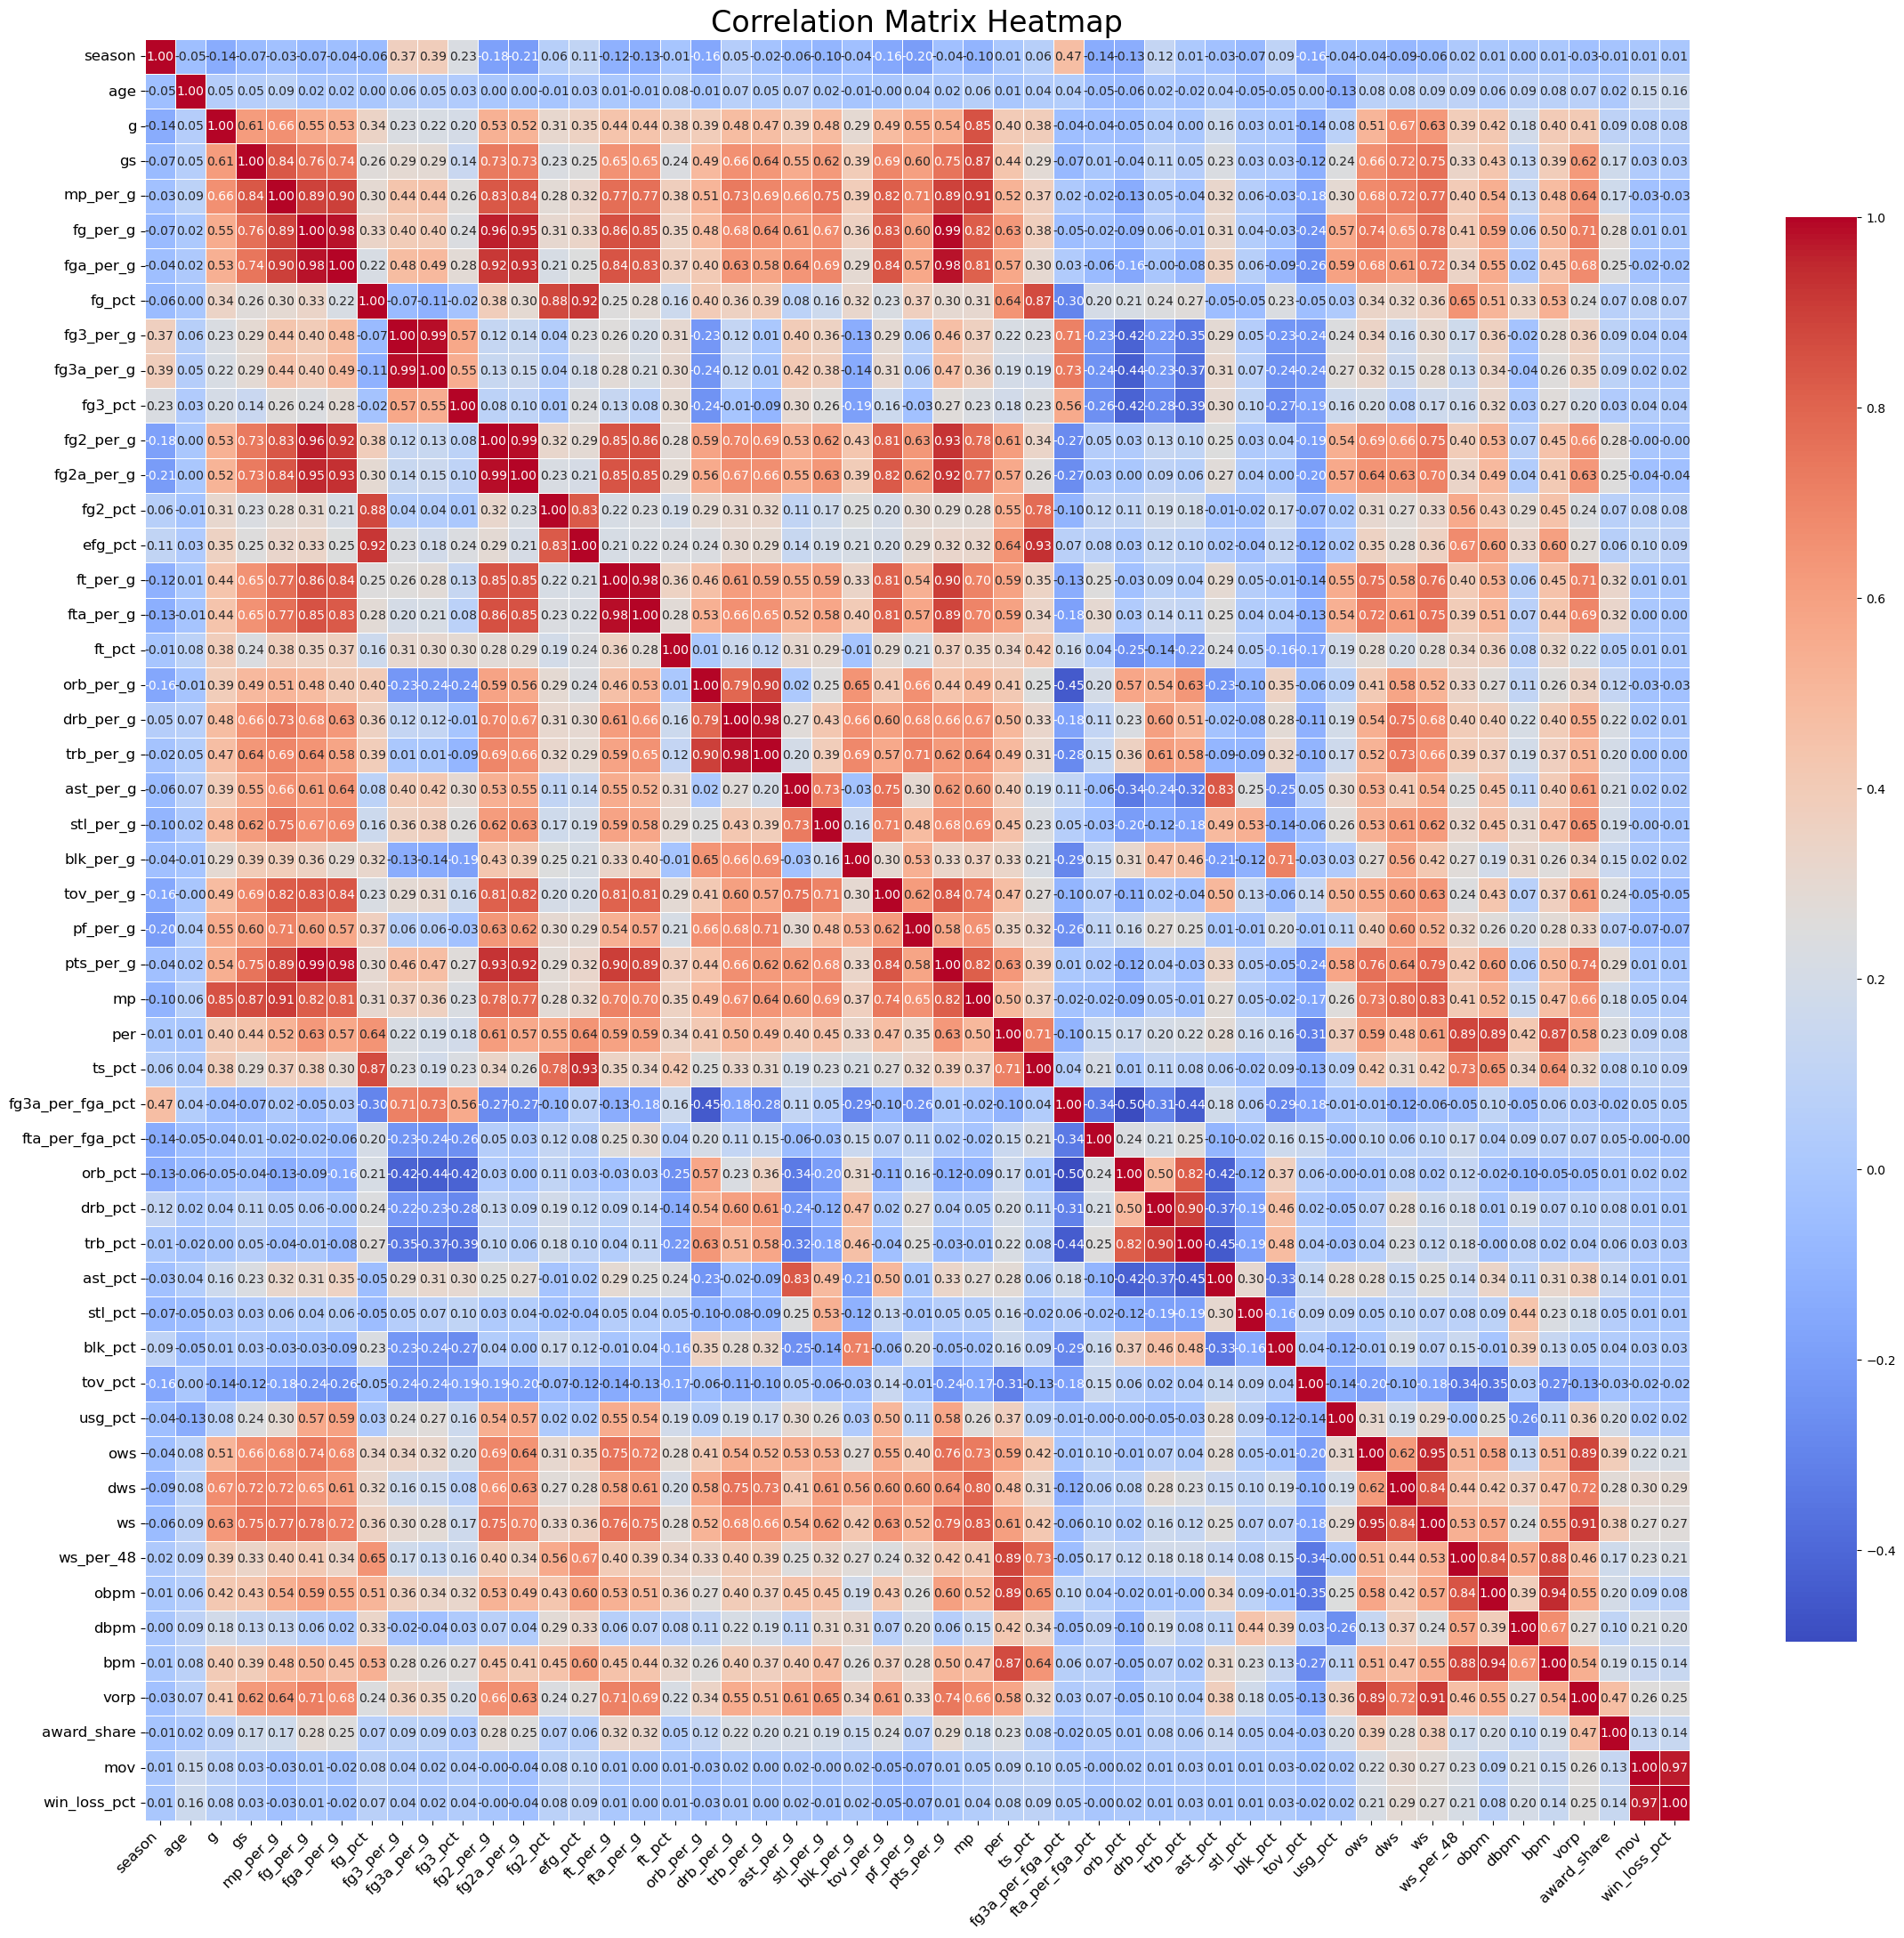

In [19]:
plt.figure(figsize=(28, 26))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17089.0,2003.139973,11.339235,1982.000,1994.000,2004.000,2013.000,2021.000
age,17089.0,26.681608,4.103291,18.000,23.000,26.000,29.000,44.000
g,17089.0,53.855521,25.189047,1.000,35.000,61.000,76.000,85.000
gs,17089.0,26.246708,29.488784,0.000,1.000,11.000,53.000,83.000
mp_per_g,17089.0,20.461408,10.117232,0.700,12.000,19.900,28.900,43.700
fg_per_g,17089.0,3.188191,2.273624,0.000,1.400,2.600,4.500,13.400
fga_per_g,17089.0,7.003511,4.702245,0.000,3.300,5.900,9.900,27.800
fg_pct,17089.0,0.441187,0.094713,0.000,0.405,0.446,0.488,1.000
fg3_per_g,17089.0,0.462239,0.642649,0.000,0.000,0.100,0.800,5.300
fg3a_per_g,17089.0,1.337153,1.697327,0.000,0.000,0.500,2.200,13.200


#### FEATURE SELECTION USING BY RANDOM FOREST

In [21]:
## Feature Importance Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('award_share', axis = 1) ## independent features
y = df['award_share'] ## dependent feature

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

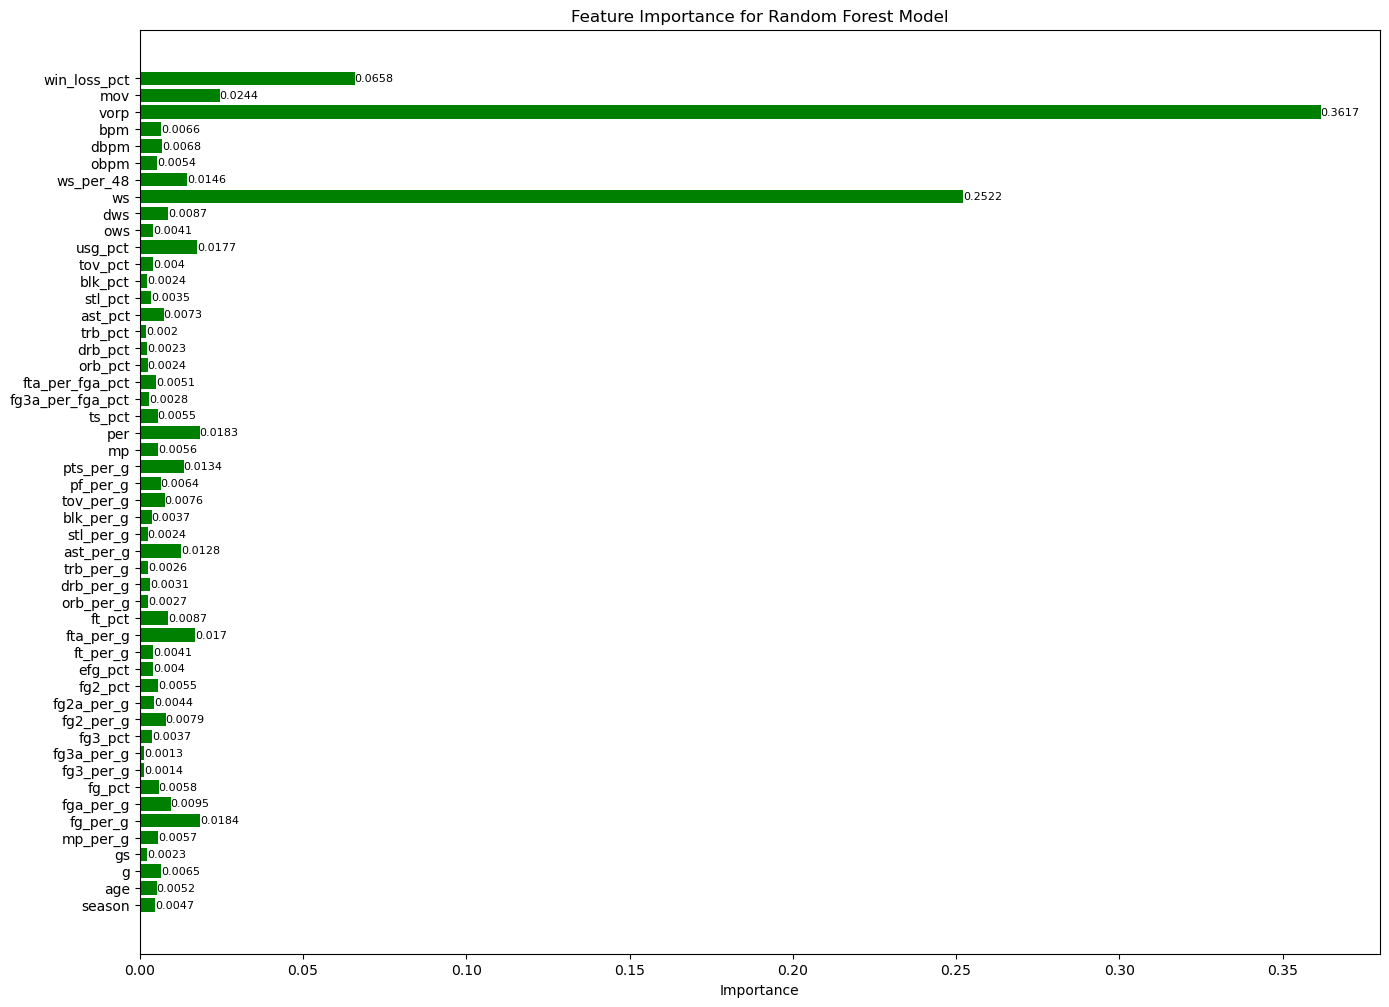

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

fig, ax = plt.subplots(figsize=(16, 12))
bars = ax.barh(range(len(feature_importance)), feature_importance, color='green')
ax.set_title('Feature Importance for Random Forest Model')
ax.set_yticks(range(len(X.columns)))
ax.set_yticklabels(X.columns)
ax.set_xlabel('Importance')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4),
             va='center', ha='left', color='black', fontsize=8)
plt.show()

In [25]:
selected_features = X.columns[feature_importance > 0.01]
selected_features_df = X[selected_features]

In [26]:
selected_features_df.columns

Index(['fg_per_g', 'fta_per_g', 'ast_per_g', 'pts_per_g', 'per', 'usg_pct',
       'ws', 'ws_per_48', 'vorp', 'mov', 'win_loss_pct'],
      dtype='object')

In [27]:
selected_features_df.head()

,fg_per_g,fta_per_g,ast_per_g,pts_per_g,per,usg_pct,ws,ws_per_48,vorp,mov,win_loss_pct
0,9.9,5.8,3.0,23.9,23.4,25.6,10.7,0.192,4.7,4.87,0.695
1,6.4,2.9,4.5,15.1,18.6,22.8,7.2,0.144,3.4,3.45,0.561
2,7.5,4.8,3.2,18.7,17.3,29.8,1.9,0.061,1.0,-4.43,0.341
3,1.5,1.2,1.6,4.1,10.1,21.5,0.5,0.042,-0.1,6.38,0.768
4,4.5,4.6,8.0,12.6,14.3,17.9,5.2,0.115,1.1,6.38,0.768


### FINDING BEST REGRESSION MODEL USING PIPELINE

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [29]:
X = selected_features_df
y = df['award_share']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression()))
]

In [30]:
pipelines = []

for model_name, model in models:
    pipelines.append((
        model_name,
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    ))

Linear Regression Metrics:
  Mean Squared Error (MSE): 0.0024
  R-squared (R2): 0.2377
  Mean Absolute Error (MAE): 0.0197


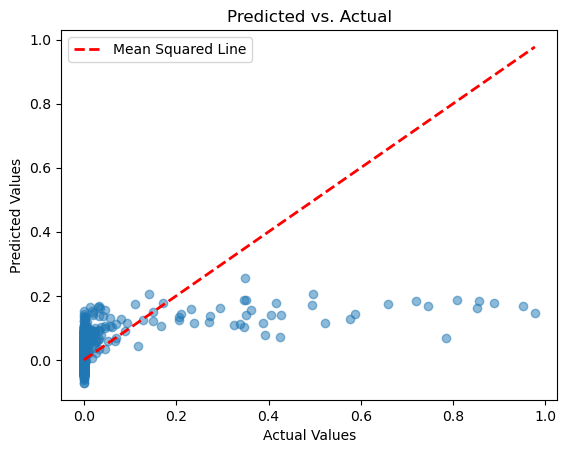

Ridge Regression Metrics:
  Mean Squared Error (MSE): 0.0024
  R-squared (R2): 0.2378
  Mean Absolute Error (MAE): 0.0196


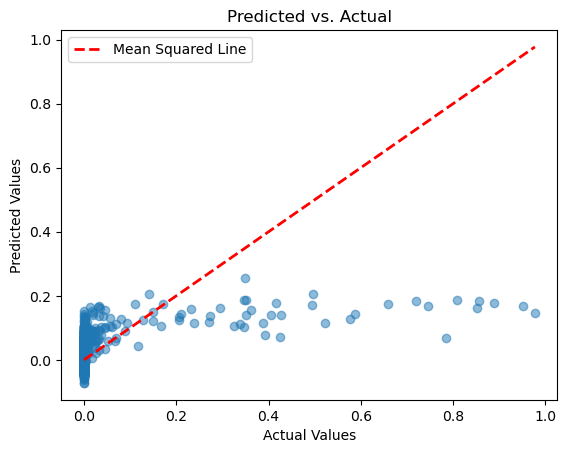

Lasso Regression Metrics:
  Mean Squared Error (MSE): 0.0032
  R-squared (R2): -0.0000
  Mean Absolute Error (MAE): 0.0118


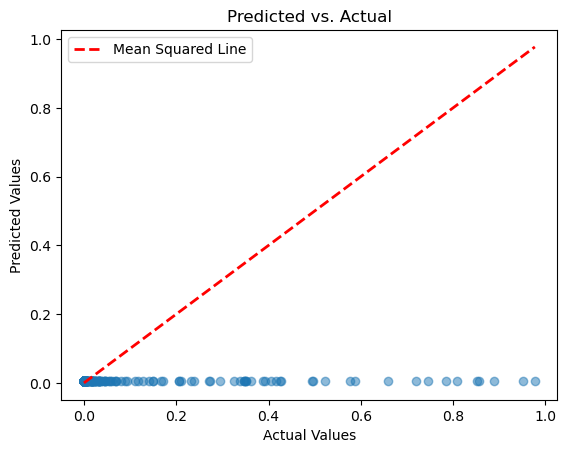

Decision Tree Metrics:
  Mean Squared Error (MSE): 0.0022
  R-squared (R2): 0.3184
  Mean Absolute Error (MAE): 0.0059


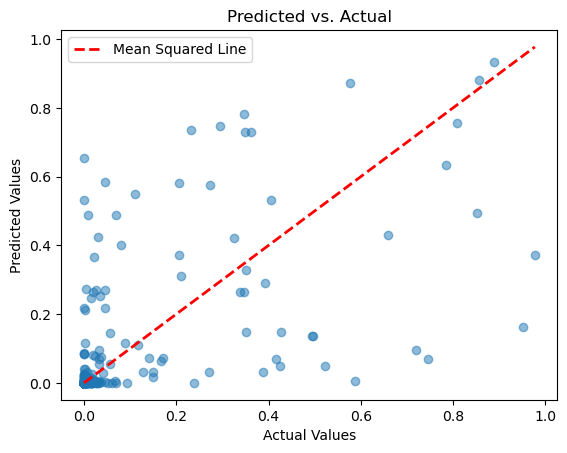

Random Forest Metrics:
  Mean Squared Error (MSE): 0.0010
  R-squared (R2): 0.6839
  Mean Absolute Error (MAE): 0.0045


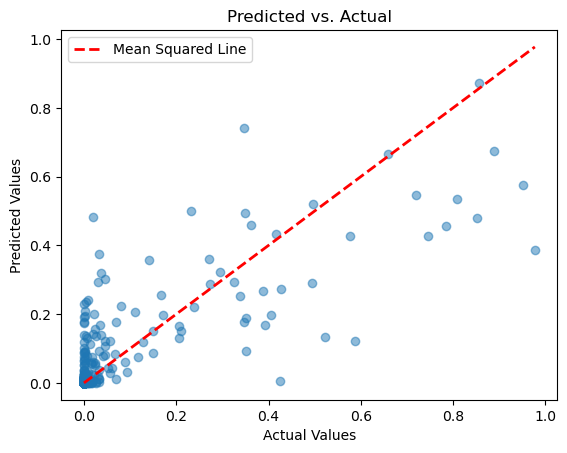

Polynomial Regression Metrics:
  Mean Squared Error (MSE): 0.0015
  R-squared (R2): 0.5365
  Mean Absolute Error (MAE): 0.0147


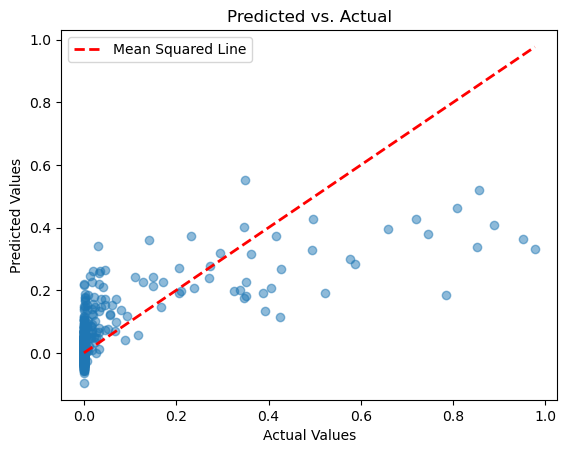

In [31]:
for model_name, model in pipelines:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R-squared (R2): {r2:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Mean Squared Line')
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

In [32]:
### It seems that Random Forest is the best model. Beacuse the highest R2 value and the lowest MSE and MAE value .

#### OUT OF SAMPLE PREDICTION

In [33]:
## defining max_share and max_share_index to see the index and share value
max_share = -1
max_share_index = -1

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

X_2022 = predict_data[selected_features]
y_2022_pred = rf_model.predict(X_2022)

# prediction
for index, pred in enumerate(y_2022_pred):
    print(f"Player at index {index}, Predicted Award Share: {pred:.4f}")

    # Updating max_share and max_share_index if the current prediction is higher
    if pred > max_share:
        max_share = pred
        max_share_index = index

# Printing the player with the highest predicted award_share
print(f"\nThe player with the highest predicted award_share is at index {max_share_index}, with a value of {max_share:.4f}")


Player at index 0, Predicted Award Share: 0.0000
Player at index 1, Predicted Award Share: 0.0000
Player at index 2, Predicted Award Share: 0.0050
Player at index 3, Predicted Award Share: 0.0000
Player at index 4, Predicted Award Share: 0.0000
Player at index 5, Predicted Award Share: 0.0000
Player at index 6, Predicted Award Share: 0.0000
Player at index 7, Predicted Award Share: 0.0001
Player at index 8, Predicted Award Share: 0.0000
Player at index 9, Predicted Award Share: 0.0000
Player at index 10, Predicted Award Share: 0.0000
Player at index 11, Predicted Award Share: 0.5169
Player at index 12, Predicted Award Share: 0.0000
Player at index 13, Predicted Award Share: 0.0000
Player at index 14, Predicted Award Share: 0.0000
Player at index 15, Predicted Award Share: 0.0000
Player at index 16, Predicted Award Share: 0.0000
Player at index 17, Predicted Award Share: 0.0000
Player at index 18, Predicted Award Share: 0.0000
Player at index 19, Predicted Award Share: 0.0000
Player at 

In [34]:
### The player with index 289 is Nikola Jokic

### Prediction Of MVP-2023

In [35]:
## cleaning the data

In [36]:
unclean_df_2023 = pd.read_csv('predict_data_2023.csv')

In [37]:
unclean_df_2023.tail()

,player,fg_per_g,fta_per_g,ast_per_g,pts_per_g,per,usg_pct,ws,ws_per_48,vorp,mov,win_loss_pct
5,Devin Booker,9.9,6.8,5.5,27.8,22.0,31.8,6.0,0.157,2.9,2.07,0.549
6,Stephan Curry,10.0,5.0,6.3,29.4,24.1,31.0,7.8,0.192,4.7,1.80,0.537
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
unclean_df_2023.dropna(how='any', inplace=True)
unclean_df_2023.reset_index(drop=True, inplace=True)

In [39]:
unclean_df_2023.head()

,player,fg_per_g,fta_per_g,ast_per_g,pts_per_g,per,usg_pct,ws,ws_per_48,vorp,mov,win_loss_pct
0,Nikolo Jokic,9.4,6.0,9.8,24.5,31.5,27.2,14.9,0.308,8.8,3.33,0.646
1,Luka Doncic,10.9,10.5,8.0,32.4,28.7,37.6,10.2,0.204,6.6,0.07,0.463
2,Joel Embiid,11.0,11.7,4.2,33.1,31.4,37.0,12.3,0.259,6.4,4.32,0.659
3,Giannis Anteto,11.2,12.3,5.7,31.1,29.0,38.8,8.6,0.204,5.4,3.63,0.707
4,Damian Lillard,9.6,9.6,7.3,32.2,26.7,33.8,9.0,0.205,4.9,-4.01,0.402


In [40]:
unclean_df_2023.drop(columns='player', inplace = True)

In [41]:
df_2023 = unclean_df_2023.copy()

In [42]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fg_per_g      7 non-null      float64
 1   fta_per_g     7 non-null      float64
 2   ast_per_g     7 non-null      float64
 3   pts_per_g     7 non-null      float64
 4   per           7 non-null      float64
 5   usg_pct       7 non-null      float64
 6   ws            7 non-null      float64
 7   ws_per_48     7 non-null      float64
 8   vorp          7 non-null      float64
 9   mov           7 non-null      float64
 10  win_loss_pct  7 non-null      float64
dtypes: float64(11)
memory usage: 748.0 bytes


In [43]:
max_share_2023 = -1
max_share_index_2023 = -1

rf_model_2023 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_2023.fit(X_train, y_train)

X_2023 = df_2023
y_2023_pred = rf_model_2023.predict(X_2023)

for index_2023, pred_2023 in enumerate(y_2023_pred):
    print(f"Player at index {index_2023}, Predicted Award Share: {pred_2023:.4f}")
   
    if pred_2023 > max_share_2023:
        max_share_2023 = pred_2023
        max_share_index_2023 = index_2023

print(f"\nThe player with the highest predicted award_share is at index {max_share_index_2023}, with a value of {max_share_2023:.4f}")

Player at index 0, Predicted Award Share: 0.5298
Player at index 1, Predicted Award Share: 0.3049
Player at index 2, Predicted Award Share: 0.4485
Player at index 3, Predicted Award Share: 0.3781
Player at index 4, Predicted Award Share: 0.0878
Player at index 5, Predicted Award Share: 0.0293
Player at index 6, Predicted Award Share: 0.0313

The player with the highest predicted award_share is at index 0, with a value of 0.5298


In [44]:
## The player with index 0 is Nikola Jokic

### Prediction Of MVP-2024

In [45]:
unclean_df_2024 = pd.read_csv('predict_data_2024.csv')

In [46]:
unclean_df_2024.dropna(how='any', inplace=True)
unclean_df_2024.reset_index(drop=True, inplace=True)

In [47]:
unclean_df_2024.head()

,player,fg_per_g,fta_per_g,ast_per_g,pts_per_g,per,usg_pct,ws,ws_per_48,vorp,mov,win_loss_pct
0,Nikolo Jokic,9.9,5.6,9.2,25.5,31.2,29.3,7.8,0.303,5.0,5.42,0.684
1,Luka Doncic,11.4,8.7,9.1,33.6,27.5,36.0,5.3,0.204,3.6,1.68,0.579
2,Joel Embiid,11.6,11.6,6.0,34.6,34.0,38.1,5.7,0.296,3.3,8.23,0.657
3,Giannis Anteto,11.7,11.4,5.9,31.4,29.7,33.3,6.3,0.237,3.2,4.22,0.676
4,Shai Gilgeous-Alexander,11.3,8.7,6.4,31.5,31.0,32.7,7.4,0.300,3.6,7.57,0.686


In [48]:
unclean_df_2024.drop(columns='player', inplace = True)

In [49]:
df_2024 = unclean_df_2024.copy()

In [50]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fg_per_g      5 non-null      float64
 1   fta_per_g     5 non-null      float64
 2   ast_per_g     5 non-null      float64
 3   pts_per_g     5 non-null      float64
 4   per           5 non-null      float64
 5   usg_pct       5 non-null      float64
 6   ws            5 non-null      float64
 7   ws_per_48     5 non-null      float64
 8   vorp          5 non-null      float64
 9   mov           5 non-null      float64
 10  win_loss_pct  5 non-null      float64
dtypes: float64(11)
memory usage: 572.0 bytes


In [51]:
max_share_2024 = -1
max_share_index_2024 = -1

rf_model_2024 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_2024.fit(X_train, y_train)

X_2024 = df_2024
y_2024_pred = rf_model_2024.predict(X_2024)

for index_2024, pred_2024 in enumerate(y_2024_pred):
    print(f"Player at index {index_2024}, Predicted Award Share: {pred_2024:.4f}")
    
    if pred_2024 > max_share_2024:
        max_share_2024 = pred_2024
        max_share_index_2024 = index_2024

print(f"\nThe player with the highest predicted award_share is at index {max_share_index_2024}, with a value of {max_share_2024:.4f}")

Player at index 0, Predicted Award Share: 0.1882
Player at index 1, Predicted Award Share: 0.1379
Player at index 2, Predicted Award Share: 0.4142
Player at index 3, Predicted Award Share: 0.2775
Player at index 4, Predicted Award Share: 0.1546

The player with the highest predicted award_share is at index 2, with a value of 0.4142


In [52]:
##The player with index 2 is Joel Embiid